In [2]:
import sys, os
sys.path.append('../src')
import numpy as np
from U1Funcs import NuRates, dRdEU1FI, DMvRatesGen, dRdEU1KineticMxing
from WIMPFuncs import C_SI
from Params import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import interpolate

In [5]:
E_th = 1*1e-2*1e-6 # Threshold
E_max = 8*1e-6 # Max recoil energy
ne = 7 # number of energy bins
Nuc = Xe131
# The energy transition function for CEvNS
myPath = os.path.join(os.path.abspath(os.path.pardir),'data','detection')
ERList, ionLow, ionFiducial, ionHigh = np.loadtxt(os.path.join(myPath,'ionXenonDat.csv'),delimiter=',')
neERFuncList = [np.vectorize(interpolate.interp1d(ERList,ionData)) for ionData in \
                [ionLow, ionFiducial, ionHigh]]
# DM-electron Rates
temp = np.loadtxt(os.path.join(myPath,'DMElectronStandard.csv'),delimiter=',')
mDMList = temp[:,0]
DMElectronStandardList = temp[:,1:11]

thresholdBin=1

In [6]:
nuGen = NuRates(E_th,E_max,ne,Nuc)
RNuSMList = [nuGen.vRatesFIGenLow(dRdEU1FI, [], neERFunc) for neERFunc in neERFuncList]

[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]


In [7]:
[len(d) for d in RNuSMList]

[13, 13, 13]

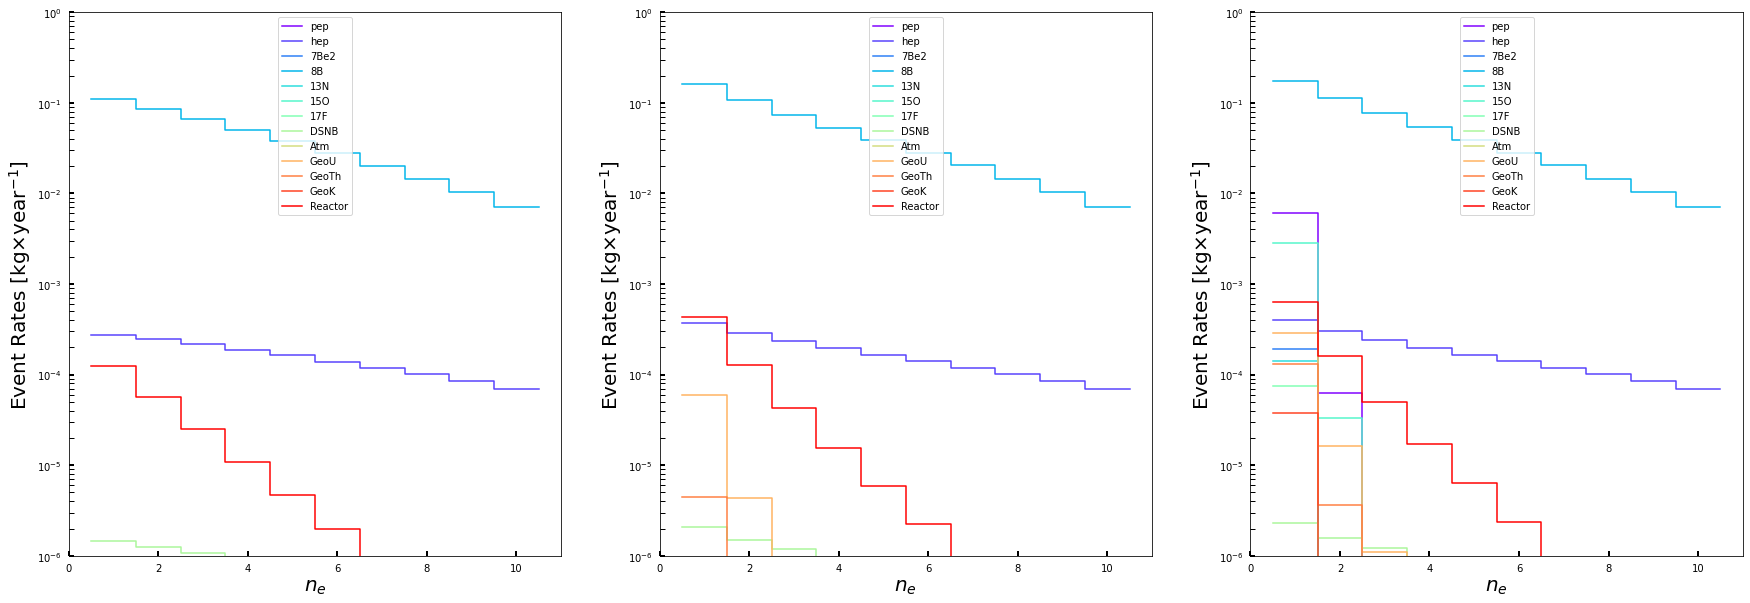

In [14]:
def showSpectrum(ax, nuDat, labelList):
    nBins = len(nuDat[0])
    xMin, xMax = 10+0.5-nBins, 10+0.5
    StatX = np.linspace(xMin,xMax,nBins+1)
    DatX = np.array(list(map(lambda x: [x,x], StatX[1:-1]))).flatten()
    DatX = np.append([StatX[0]], np.append(DatX, [StatX[-1]]))
    def datYGen(dat):
        StatY = dat
        DatY = np.array(list(map(lambda x: [x,x], StatY))).flatten()
        return DatY
    
    yList = [datYGen(d) for d in nuDat]
    x = DatX
    colorList = cm.rainbow(linspace(0,1,len(nuDat)))
    for i in range(len(nuDat)):
        ax.plot(x, yList[i], color=colorList[i], linestyle='-', label=labelList[i])
    
    ax.set_yscale('log')
    
    lfs = 20
    ax.set_xlabel(r"$n_e$",fontsize=lfs)
    ax.set_ylabel(r'Event Rates [kg$\times$year$^{-1}$]',fontsize=lfs)
    
    #ax.set_xlim([xMin-0.5,xMax+0.5])
    ax.set_ylim([1e-6,1e0])

    ax.tick_params(which='major',direction='in',width=2,length=5,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=5)
    
    ax.legend()
    return fig

fig, ax = plt.subplots(1, 3, figsize=(30,10))

labelList = nuGen._Names
for i in range(len(RNuSMList)):
    showSpectrum(ax[i], RNuSMList[i], labelList)

In [16]:
[RNuSMList[0][0], RNuSMList[0][1], RNuSMList[0][3]]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2.76666279e-04, 2.46930621e-04, 2.16772454e-04, 1.88521632e-04,
        1.62730508e-04, 1.39474458e-04, 1.18696131e-04, 1.00292079e-04,
        8.41310659e-05, 7.00595942e-05]),
 array([0.1092782 , 0.08605416, 0.06629254, 0.05031176, 0.03767523,
        0.02783336, 0.0202737 , 0.01454992, 0.01028188, 0.00715024])]

In [21]:
ne = 7 # number of energy bins
E_th = 0.5e0*1e-6 # Threshold
E_max = 4e0*1e-6 # Max recoil energy
Nuc = Xe131

nuGen2 = NuRates(E_th,E_max,ne,Nuc)
RvNSM = nuGen2.vRatesSM()[0]

[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]


In [31]:
len(DatX)

10

In [32]:
[len(datYGen(d)) for d in RvNSM]

[14, 14, 14, 14, 14]

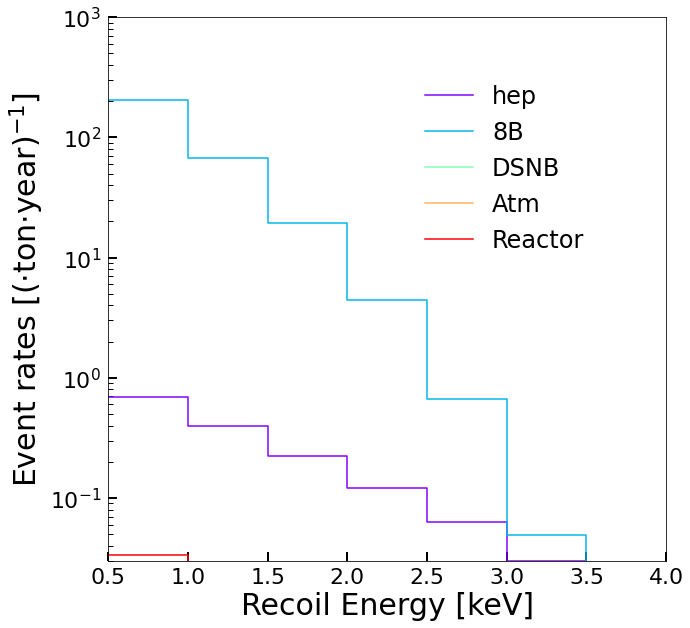

In [33]:
labelList = nuGen2._Names
colorList = cm.rainbow(linspace(0,1,len(RvNSM)))

fig, ax = plt.subplots(figsize=(10,10))

nBins = len(RvNSM[0])
xMin, xMax = E_th, E_max
StatX = np.linspace(xMin,xMax,nBins+1)*1e6
DatX = np.array(list(map(lambda x: [x,x], StatX[1:-1]))).flatten()
DatX = np.append([StatX[0]], np.append(DatX, [StatX[-1]]))
def datYGen(dat):
    StatY = dat
    DatY = np.array(list(map(lambda x: [x,x], StatY))).flatten()
    return DatY

for i in range(len(RvNSM)):
    ax.plot(DatX, datYGen(RvNSM[i]), color=colorList[i], label=labelList[i])

ax.set_yscale('log')

lfs = 30
ax.set_xlabel(r"Recoil Energy [keV]",fontsize=lfs)
ax.set_ylabel(r'Event rates [($\cdot$ton$\cdot$year)$^{-1}$]',fontsize=lfs)

ax.set_xlim([5e-1,4e0])
ax.set_ylim([3e-2,1e3])

ax.tick_params(which='major',direction='in',width=2,length=9,pad=7,labelsize=22)
ax.tick_params(which='minor',direction='in',width=1,length=5)
ax.legend(fontsize=24,frameon=True,loc=(0.55,0.55),framealpha=0)

In [34]:
myPath = os.path.join(os.path.abspath(os.path.pardir),'data','detection')
Xenon1TEffDat = np.transpose(np.loadtxt(os.path.join(myPath,'Xenon8BEfficiency.csv'),delimiter=','))
Xenon1TEffFunc = lambda x: np.interp(x, Xenon1TEffDat[0], Xenon1TEffDat[1])

PandaX4TEffDat = np.transpose(np.loadtxt(os.path.join(myPath,'PandaX4TEfficiency.txt')))
PandaX4TEffFunc = lambda x: np.interp(x, PandaX4TEffDat[0], PandaX4TEffDat[1])

In [48]:
def DMLimitParaGenPadnaX4T(E_th,E_max,EffFunc):
    nuGen = NuRates(E_th,E_max,ne,Nuc)
    temp = nuGen.vDifferentialRatesSMCheck()
    x, yList = temp[1], temp[0]
    index8B = np.where(nuGen._Names == '8B')[0][0]
    n8BSM = yList[index8B]
    nNuSM = np.trapz(n8BSM,x)
    nNuSMEff = np.trapz(n8BSM*EffFunc(x),x)
    return [[nNuSM, nNuSM*200], [nNuSMEff, nNuSMEff*200], nNuSMEff/nNuSM]
    
E_th2,E_max2 = 0.6*1e-6, 3.0*1e-6
DMLimitParaGenPadnaX4T(E_th2,E_max2,PandaX4TEffFunc)

[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]


[[234.91540018365282, 46983.080036730564],
 [3.465437447785986, 693.0874895571973],
 0.014751852986550762]

In [54]:
# 阈值选为0.6 keV 可对应PandaX文章讨论，但和我们选择constant efficiency 0.1不一致
# 选为1 keV为0.3，这是因为原本效率问题，差不多得了
E_th2,E_max2 = 1*1e-6, 3.0*1e-6
DMLimitParaGenPadnaX4T(E_th2,E_max2,PandaX4TEffFunc)

[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]


[[90.5210747529238, 18104.21495058476],
 [2.8504570825404993, 570.0914165080999],
 0.03148943039309673]

In [53]:
PandaX4TEffFunc(3.0*1e-6)

0.001304878579297328

In [40]:
from U1PlotFuncs import *

In [ ]:
np.interp(

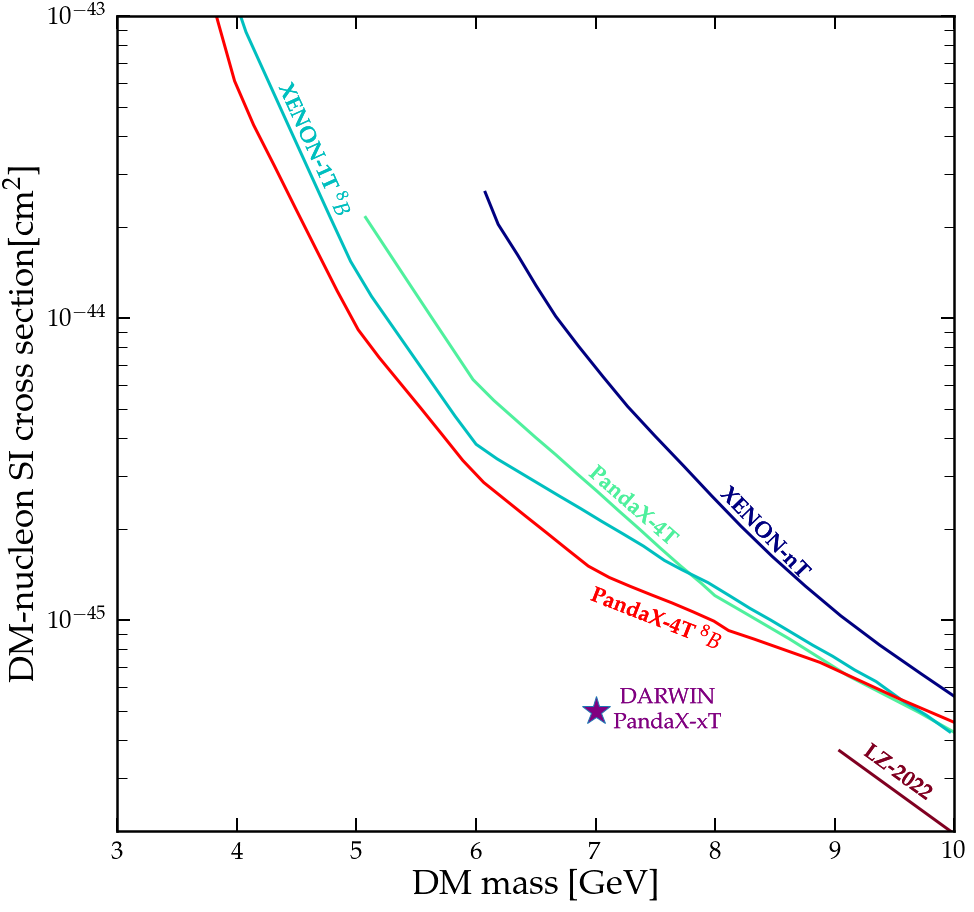

In [75]:
fig, ax1 = plt.subplots(figsize=(15,15))
# Plot style
lw, tfs = 2.5, 25
lfs = 35
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mathpazo}'
#========================== limits =======================================================#
ax1, lines=MakeLimitPlot_DMNSI(ax1,xmin=3.0e0,xmax=1e1,ymin=2e-46,ymax=1e-43,\
             facecolor='darkgray',edgecolor='darkgray',edgecolor_collected='darkgray',\
             alph=0.5,lfs=35,tfs=25)
labelLines([lines[-1]], xvals=[7.5], fontsize=22,outline_color=[1,0,0,0], yoffsets=-2e-46)
labelLines(lines[:-1], xvals=[8,6.9,9.2,4.3], fontsize=22,outline_color=[1,0,0,0],ha="left",va="bottom")

ax1.plot(7,5e-46,'*',markersize=30,mfc='purple')
l1 = ax1.axhline(5e-46, c=[0,0,0,0], linestyle='-.', label="DARWIN\nPandaX-xT")
labelLines([l1], xvals=7.6, color='purple',fontsize=22, outline_width=0,drop_label=True)
#=========================== labels ===================================================#
ax1.set_yscale('log')
ax1.set_xlabel(r"DM mass [GeV]",fontsize=lfs)
ax1.set_ylabel(r"DM-nucleon SI cross section[cm$^2$]",fontsize=lfs)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10,labelsize=25)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)